In [7]:
import numpy as np
import pandas as pd
import data_pipeline2 as dp
import seaborn as sns
from test_fncs import recursive_pred
import torch.nn as nn
import torch

import training_models as tm
import ml_models
from sklearn.metrics import r2_score

import pinns

In [8]:
df_train, df_test = dp.get_cmapss_data(0, 80, data_dir ='data_synthetic', chosen_sensor = 11)

input_sizes = [5,10,20,40]

config = {
    'input_size' : 30,
    'lr' : 1e-4,
    'batch_size' : 32,
    'hidden_size' : 8,
    'output_size' : 40,
    'layer_amt' : 3
    }

In [32]:
loss = nn.MSELoss()

results = []
output_size = 40

for input_size in input_sizes:

    # Update configuration
    config['input_size'] = input_size
    
    mod = tm.train_model(config, it_amt=0, model_fnc=ml_models.MLP, data_dir='data_synthetic')
    mod = pinns.decay_pinn(mod)
    
    state_dict= torch.load('pinn_models_1/mlp/'+'output_size' + str(output_size) + 'input_size' + str(input_size) + '.pt')

    mod.load_state_dict(state_dict)

    mod.eval()

    # Load data
    dataloader, idx = dp.get_loaded_data(df_test, win_size=config['input_size'], 
                                         outp_size=config['output_size'], batch_size=32, shuffle=False)

    preds, ys = [], []
    tot_loss = 0.0

    # Loop through batches
    for data in dataloader:
        x, y, tx, ty, sensor = data
        ys.append(y)
        pred = mod(x)
        loss_val = loss(pred, y).item()

        preds.append(pred)

        tot_loss += loss_val

    # Convert to tensor
    preds_tensor = torch.cat(preds).detach()#.numpy()

    ys = torch.concat(ys)

    mses = (torch.mean((preds_tensor - ys)**2, axis = 0)).tolist()


        # Save results
    results.append({
        'model' : 'MLP_pinn1',
        'input_size': input_size,
        'mses' : mses,  # Save as list if needed
    })

    # Also store in df_test
    #df_test[f'mlp_outp{output_size}_inp{input_size}'] = preds_tensor

# Create DataFrame
df_results = pd.DataFrame(results)

Finished Training
Finished Training


C:\Users\livb\AppData\Local\Temp\ipykernel_18844\233533889.py:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict= torch.load('pinn_models_1/mlp/'+'output_size' + s

Finished Training
Finished Training


C:\Users\livb\AppData\Local\Temp\ipykernel_18844\233533889.py:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict= torch.load('pinn_models_1/mlp/'+'output_size' + s

In [33]:
df_results

,model,input_size,mses
0,MLP_pinn1,5,"[0.2559981346130371, 0.2537282407283783, 0.257..."
1,MLP_pinn1,10,"[0.2369845062494278, 0.23755180835723877, 0.24..."
2,MLP_pinn1,20,"[0.232007697224617, 0.23218810558319092, 0.234..."
3,MLP_pinn1,40,"[0.2331041693687439, 0.23279936611652374, 0.23..."


In [34]:
results = []

for input_size in input_sizes:

    # Update configuration
    config['input_size'] = input_size
    
    mod = tm.train_model(config, it_amt=0, model_fnc=ml_models.MLP, data_dir='data_synthetic')
    mod = pinns.decay_pinn(mod)
    
    state_dict= torch.load('pinn_models_2/mlp/'+'output_size' + str(output_size) + 'input_size' + str(input_size) + '.pt')

    mod.load_state_dict(state_dict)

    mod.eval()

    # Load data
    dataloader, idx = dp.get_loaded_data(df_test, win_size=config['input_size'], 
                                         outp_size=config['output_size'], batch_size=32, shuffle=False)

    preds,ys = [], []
    tot_loss = 0.0

    # Loop through batches
    for data in dataloader:
        x, y, tx, ty, sensor = data
        pred = mod(x)
        loss_val = loss(pred, y).item()

        preds.append(pred)

        ys.append(y)

        tot_loss += loss_val

    # Convert to tensor
    preds_tensor = torch.cat(preds).detach()#.numpy()
    ys = torch.concat(ys)


    mses = (torch.mean((preds_tensor - ys)**2, axis = 0)).tolist()


        # Save results
        # Save results
    results.append({
        'model' : 'MLP_pinn2',
        'input_size': input_size,
        'mses' : mses,  # Save as list if needed
    })
        # Also store in df_test
        #df_test[f'mlp_outp{output_size}_inp{input_size}'] = preds_tensor

# Create DataFrame
df_this = pd.DataFrame(results)
df_results = pd.concat([df_this, df_results])

Finished Training
Finished Training


C:\Users\livb\AppData\Local\Temp\ipykernel_18844\3349741936.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict= torch.load('pinn_models_2/mlp/'+'output_size' + 

Finished Training
Finished Training


C:\Users\livb\AppData\Local\Temp\ipykernel_18844\3349741936.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict= torch.load('pinn_models_2/mlp/'+'output_size' + 

In [35]:
results = []

for input_size in input_sizes:

    # Update configuration
    config['input_size'] = input_size
    
    mod = tm.train_model(config, it_amt=0, model_fnc=ml_models.MLP, data_dir='data_synthetic')
    mod = pinns.decay_pinn(mod)
    
    state_dict= torch.load('pinn_models_3/mlp/'+'output_size' + str(output_size) + 'input_size' + str(input_size) + '.pt')

    mod.load_state_dict(state_dict)

    mod.eval()

    # Load data
    dataloader, idx = dp.get_loaded_data(df_test, win_size=config['input_size'], 
                                         outp_size=config['output_size'], batch_size=32, shuffle=False)

    preds,ys = [], []
    tot_loss = 0.0

    # Loop through batches
    for data in dataloader:
        x, y, tx, ty, sensor = data
        pred = mod(x)
        loss_val = loss(pred, y).item()

        preds.append(pred)

        ys.append(y)

        tot_loss += loss_val

    # Convert to tensor
    preds_tensor = torch.cat(preds).detach()#.numpy()
    ys = torch.concat(ys)


    mses = (torch.mean((preds_tensor - ys)**2, axis = 0)).tolist()


        # Save results
        # Save results
    results.append({
        'model' : 'MLP_pinn3',
        'input_size': input_size,
        'mses' : mses,  # Save as list if needed
    })
        # Also store in df_test
        #df_test[f'mlp_outp{output_size}_inp{input_size}'] = preds_tensor

# Create DataFrame
df_this = pd.DataFrame(results)
df_results = pd.concat([df_this, df_results])

Finished Training
Finished Training


C:\Users\livb\AppData\Local\Temp\ipykernel_18844\1320250332.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict= torch.load('pinn_models_3/mlp/'+'output_size' + 

Finished Training
Finished Training


C:\Users\livb\AppData\Local\Temp\ipykernel_18844\1320250332.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict= torch.load('pinn_models_3/mlp/'+'output_size' + 

In [36]:
results = []

for input_size in input_sizes:

    # Update configuration
    config['input_size'] = input_size
    
    mod = tm.train_model(config, it_amt=0, model_fnc=ml_models.CNN, data_dir='data_synthetic')
    mod = pinns.decay_pinn(mod)
    
    state_dict= torch.load('pinn_models_1/cnn/'+'output_size' + str(output_size) + 'input_size' + str(input_size) + '.pt')

    mod.load_state_dict(state_dict)

    mod.eval()

    # Load data
    dataloader, idx = dp.get_loaded_data(df_test, win_size=config['input_size'], 
                                         outp_size=config['output_size'], batch_size=32, shuffle=False)

    preds,ys = [], []
    tot_loss = 0.0

    # Loop through batches
    for data in dataloader:
        x, y, tx, ty, sensor = data
        pred = mod(x)
        loss_val = loss(pred, y).item()

        preds.append(pred)

        ys.append(y)

        tot_loss += loss_val

    # Convert to tensor
    preds_tensor = torch.cat(preds).detach()#.numpy()
    ys = torch.concat(ys)


    mses = (torch.mean((preds_tensor - ys)**2, axis = 0)).tolist()


        # Save results
        # Save results
    results.append({
        'model' : 'CNN_pinn1',
        'input_size': input_size,
        'mses' : mses,  # Save as list if needed
    })
        # Also store in df_test
        #df_test[f'mlp_outp{output_size}_inp{input_size}'] = preds_tensor

# Create DataFrame
df_this = pd.DataFrame(results)
df_results = pd.concat([df_this, df_results])

Finished Training


C:\Users\livb\AppData\Local\Temp\ipykernel_18844\2272840251.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict= torch.load('pinn_models_1/cnn/'+'output_size' + 

Finished Training
Finished Training


C:\Users\livb\AppData\Local\Temp\ipykernel_18844\2272840251.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict= torch.load('pinn_models_1/cnn/'+'output_size' + 

Finished Training


C:\Users\livb\AppData\Local\Temp\ipykernel_18844\2272840251.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict= torch.load('pinn_models_1/cnn/'+'output_size' + 

In [37]:
results = []

for input_size in input_sizes:

    # Update configuration
    config['input_size'] = input_size
    
    mod = tm.train_model(config, it_amt=0, model_fnc=ml_models.CNN, data_dir='data_synthetic')
    mod = pinns.decay_pinn(mod)
    
    state_dict= torch.load('pinn_models_2/cnn/'+'output_size' + str(output_size) + 'input_size' + str(input_size) + '.pt')

    mod.load_state_dict(state_dict)

    mod.eval()

    # Load data
    dataloader, idx = dp.get_loaded_data(df_test, win_size=config['input_size'], 
                                         outp_size=config['output_size'], batch_size=32, shuffle=False)

    preds,ys = [], []
    tot_loss = 0.0

    # Loop through batches
    for data in dataloader:
        x, y, tx, ty, sensor = data
        pred = mod(x)
        loss_val = loss(pred, y).item()

        preds.append(pred)

        ys.append(y)

        tot_loss += loss_val

    # Convert to tensor
    preds_tensor = torch.cat(preds).detach()#.numpy()
    ys = torch.concat(ys)


    mses = (torch.mean((preds_tensor - ys)**2, axis = 0)).tolist()


        # Save results
        # Save results
    results.append({
        'model' : 'CNN_pinn2',
        'input_size': input_size,
        'mses' : mses,  # Save as list if needed
    })
        # Also store in df_test
        #df_test[f'mlp_outp{output_size}_inp{input_size}'] = preds_tensor

# Create DataFrame
df_this = pd.DataFrame(results)
df_results = pd.concat([df_this, df_results])

Finished Training
Finished Training


C:\Users\livb\AppData\Local\Temp\ipykernel_18844\2888865317.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict= torch.load('pinn_models_2/cnn/'+'output_size' + 

Finished Training
Finished Training


C:\Users\livb\AppData\Local\Temp\ipykernel_18844\2888865317.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict= torch.load('pinn_models_2/cnn/'+'output_size' + 

In [38]:
results = []

for input_size in input_sizes:

    # Update configuration
    config['input_size'] = input_size
    
    mod = tm.train_model(config, it_amt=0, model_fnc=ml_models.CNN, data_dir='data_synthetic')
    mod = pinns.decay_pinn(mod)
    
    state_dict= torch.load('pinn_models_3/cnn/'+'output_size' + str(output_size) + 'input_size' + str(input_size) + '.pt')

    mod.load_state_dict(state_dict)

    mod.eval()

    # Load data
    dataloader, idx = dp.get_loaded_data(df_test, win_size=config['input_size'], 
                                         outp_size=config['output_size'], batch_size=32, shuffle=False)

    preds,ys = [], []
    tot_loss = 0.0

    # Loop through batches
    for data in dataloader:
        x, y, tx, ty, sensor = data
        pred = mod(x)
        loss_val = loss(pred, y).item()

        preds.append(pred)

        ys.append(y)

        tot_loss += loss_val

    # Convert to tensor
    preds_tensor = torch.cat(preds).detach()#.numpy()
    ys = torch.concat(ys)


    mses = (torch.mean((preds_tensor - ys)**2, axis = 0)).tolist()


        # Save results
        # Save results
    results.append({
        'model' : 'CNN_pinn3',
        'input_size': input_size,
        'mses' : mses,  # Save as list if needed
    })
        # Also store in df_test
        #df_test[f'mlp_outp{output_size}_inp{input_size}'] = preds_tensor

# Create DataFrame
df_this = pd.DataFrame(results)
df_results = pd.concat([df_this, df_results])

Finished Training
Finished Training


C:\Users\livb\AppData\Local\Temp\ipykernel_18844\2286318960.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict= torch.load('pinn_models_3/cnn/'+'output_size' + 

Finished Training
Finished Training


C:\Users\livb\AppData\Local\Temp\ipykernel_18844\2286318960.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict= torch.load('pinn_models_3/cnn/'+'output_size' + 

In [39]:
results = []

for input_size in input_sizes:

    # Update configuration
    config['input_size'] = input_size
    
    mod = tm.train_model(config, it_amt=0, model_fnc=ml_models.LSTM, data_dir='data_synthetic')
    mod = pinns.decay_pinn(mod)
    
    state_dict= torch.load('pinn_models_1/lstm/'+'output_size' + str(output_size) + 'input_size' + str(input_size) + '.pt')

    mod.load_state_dict(state_dict)

    mod.eval()

    # Load data
    dataloader, idx = dp.get_loaded_data(df_test, win_size=config['input_size'], 
                                         outp_size=config['output_size'], batch_size=32, shuffle=False)

    preds,ys = [], []
    tot_loss = 0.0

    # Loop through batches
    for data in dataloader:
        x, y, tx, ty, sensor = data
        pred = mod(x)
        loss_val = loss(pred, y).item()

        preds.append(pred)

        ys.append(y)

        tot_loss += loss_val

    # Convert to tensor
    preds_tensor = torch.cat(preds).detach()#.numpy()
    ys = torch.concat(ys)


    mses = (torch.mean((preds_tensor - ys)**2, axis = 0)).tolist()


        # Save results
        # Save results
    results.append({
        'model' : 'LSTM_pinn1',
        'input_size': input_size,
        'mses' : mses,  # Save as list if needed
    })
        # Also store in df_test
        #df_test[f'mlp_outp{output_size}_inp{input_size}'] = preds_tensor

# Create DataFrame
df_this = pd.DataFrame(results)
df_results = pd.concat([df_this, df_results])

Finished Training
Finished Training


C:\Users\livb\AppData\Local\Temp\ipykernel_18844\461211929.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict= torch.load('pinn_models_1/lstm/'+'output_size' + 

Finished Training
Finished Training


C:\Users\livb\AppData\Local\Temp\ipykernel_18844\461211929.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict= torch.load('pinn_models_1/lstm/'+'output_size' + 

In [40]:
results = []

for input_size in input_sizes:

    # Update configuration
    config['input_size'] = input_size
    
    mod = tm.train_model(config, it_amt=0, model_fnc=ml_models.LSTM, data_dir='data_synthetic')
    mod = pinns.decay_pinn(mod)
    
    state_dict= torch.load('pinn_models_2/lstm/'+'output_size' + str(output_size) + 'input_size' + str(input_size) + '.pt')

    mod.load_state_dict(state_dict)

    mod.eval()

    # Load data
    dataloader, idx = dp.get_loaded_data(df_test, win_size=config['input_size'], 
                                         outp_size=config['output_size'], batch_size=32, shuffle=False)

    preds,ys = [], []
    tot_loss = 0.0

    # Loop through batches
    for data in dataloader:
        x, y, tx, ty, sensor = data
        pred = mod(x)
        loss_val = loss(pred, y).item()

        preds.append(pred)

        ys.append(y)

        tot_loss += loss_val

    # Convert to tensor
    preds_tensor = torch.cat(preds).detach()#.numpy()
    ys = torch.concat(ys)


    mses = (torch.mean((preds_tensor - ys)**2, axis = 0)).tolist()


        # Save results
        # Save results
    results.append({
        'model' : 'LSTM_pinn2',
        'input_size': input_size,
        'mses' : mses,  # Save as list if needed
    })
        # Also store in df_test
        #df_test[f'mlp_outp{output_size}_inp{input_size}'] = preds_tensor

# Create DataFrame
df_this = pd.DataFrame(results)
df_results = pd.concat([df_this, df_results])

Finished Training
Finished Training


C:\Users\livb\AppData\Local\Temp\ipykernel_18844\1191430664.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict= torch.load('pinn_models_2/lstm/'+'output_size' +

Finished Training
Finished Training


C:\Users\livb\AppData\Local\Temp\ipykernel_18844\1191430664.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict= torch.load('pinn_models_2/lstm/'+'output_size' +

In [41]:
results = []

for input_size in input_sizes:

    # Update configuration
    config['input_size'] = input_size
    
    mod = tm.train_model(config, it_amt=0, model_fnc=ml_models.LSTM, data_dir='data_synthetic')
    mod = pinns.decay_pinn(mod)
    
    state_dict= torch.load('pinn_models_3/lstm/'+'output_size' + str(output_size) + 'input_size' + str(input_size) + '.pt')

    mod.load_state_dict(state_dict)

    mod.eval()

    # Load data
    dataloader, idx = dp.get_loaded_data(df_test, win_size=config['input_size'], 
                                         outp_size=config['output_size'], batch_size=32, shuffle=False)

    preds,ys = [], []
    tot_loss = 0.0

    # Loop through batches
    for data in dataloader:
        x, y, tx, ty, sensor = data
        pred = mod(x)
        loss_val = loss(pred, y).item()

        preds.append(pred)

        ys.append(y)

        tot_loss += loss_val

    # Convert to tensor
    preds_tensor = torch.cat(preds).detach()#.numpy()
    ys = torch.concat(ys)


    mses = (torch.mean((preds_tensor - ys)**2, axis = 0)).tolist()


        # Save results
        # Save results
    results.append({
        'model' : 'LSTM_pinn3',
        'input_size': input_size,
        'mses' : mses,  # Save as list if needed
    })
        # Also store in df_test
        #df_test[f'mlp_outp{output_size}_inp{input_size}'] = preds_tensor

# Create DataFrame
df_this = pd.DataFrame(results)
df_results = pd.concat([df_this, df_results])

Finished Training
Finished Training


C:\Users\livb\AppData\Local\Temp\ipykernel_18844\3986923311.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict= torch.load('pinn_models_3/lstm/'+'output_size' +

Finished Training
Finished Training


C:\Users\livb\AppData\Local\Temp\ipykernel_18844\3986923311.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict= torch.load('pinn_models_3/lstm/'+'output_size' +

In [22]:
df_results.to_csv('results/pinn_results.csv')

In [42]:
df_results

,model,input_size,mses
0,LSTM_pinn3,5,"[0.2560459077358246, 0.2539440095424652, 0.258..."
1,LSTM_pinn3,10,"[0.2382732480764389, 0.23797132074832916, 0.24..."
2,LSTM_pinn3,20,"[0.23547808825969696, 0.23513218760490417, 0.2..."
3,LSTM_pinn3,40,"[0.23878024518489838, 0.238510861992836, 0.239..."
0,LSTM_pinn2,5,"[0.2560234069824219, 0.2545126974582672, 0.258..."
1,LSTM_pinn2,10,"[0.23857350647449493, 0.23813946545124054, 0.2..."
2,LSTM_pinn2,20,"[0.23578542470932007, 0.23370486497879028, 0.2..."
3,LSTM_pinn2,40,"[0.24132971465587616, 0.23960424959659576, 0.2..."
0,LSTM_pinn1,5,"[0.2559751272201538, 0.25445252656936646, 0.25..."
1,LSTM_pinn1,10,"[0.23846057057380676, 0.2380496859550476, 0.24..."


In [54]:
df_results["indices"] = df_results["mses"].apply(lambda x: list(range(1, len(x) + 1)))
df_results
# Explode both `mses` and `indices` into separate rows
df_long = df_results.explode(["mses", "indices"])

df_long['pre'] = df_long['model'].str.split('_').str[0]
df_long['suff'] = df_long['model'].str.split('_').str[1]


df_long

,model,input_size,mses,indices,pre,suff
0,LSTM_pinn3,5,0.256046,1,LSTM,pinn3
0,LSTM_pinn3,5,0.253944,2,LSTM,pinn3
0,LSTM_pinn3,5,0.258182,3,LSTM,pinn3
0,LSTM_pinn3,5,0.25771,4,LSTM,pinn3
0,LSTM_pinn3,5,0.256243,5,LSTM,pinn3
...,...,...,...,...,...,...
3,MLP_pinn1,40,0.377738,36,MLP,pinn1
3,MLP_pinn1,40,0.386335,37,MLP,pinn1
3,MLP_pinn1,40,0.390339,38,MLP,pinn1
3,MLP_pinn1,40,0.413628,39,MLP,pinn1


In [73]:
df_long

,model,input_size,mses,indices,pre,suff
0,LSTM_pinn3,5,0.256046,1,LSTM,pinn3
0,LSTM_pinn3,5,0.253944,2,LSTM,pinn3
0,LSTM_pinn3,5,0.258182,3,LSTM,pinn3
0,LSTM_pinn3,5,0.25771,4,LSTM,pinn3
0,LSTM_pinn3,5,0.256243,5,LSTM,pinn3
...,...,...,...,...,...,...
3,MLP_pinn1,40,0.377738,36,MLP,pinn1
3,MLP_pinn1,40,0.386335,37,MLP,pinn1
3,MLP_pinn1,40,0.390339,38,MLP,pinn1
3,MLP_pinn1,40,0.413628,39,MLP,pinn1


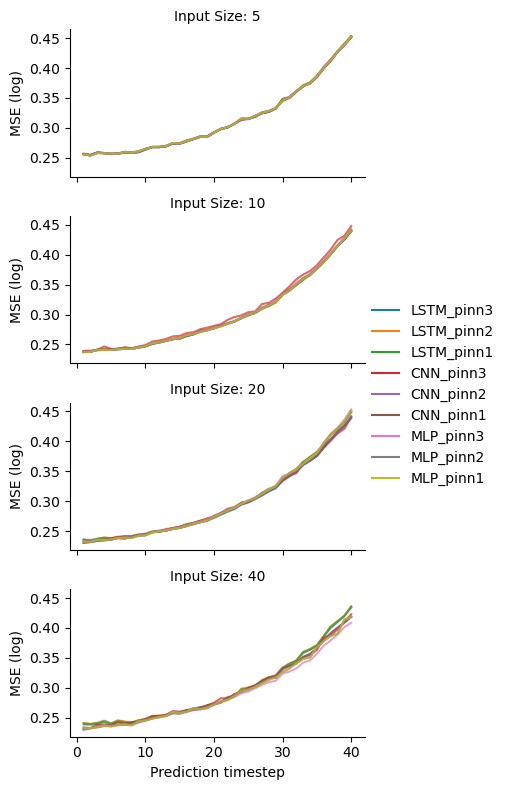

In [55]:
import matplotlib.pyplot as plt
# Create separate plots for each `input_size`

g = sns.FacetGrid(df_long, row ="input_size", sharey=True, height = 2, aspect = 2)  # Different plot per `input_size`
g.map_dataframe(sns.lineplot, x="indices", y="mses", hue="model", alpha = 0.7)


# Adjust aesthetics
g.set_axis_labels("Prediction timestep", "MSE (log)")
g.set_titles("Input Size: {row_name}")
g.add_legend()

plt.show()

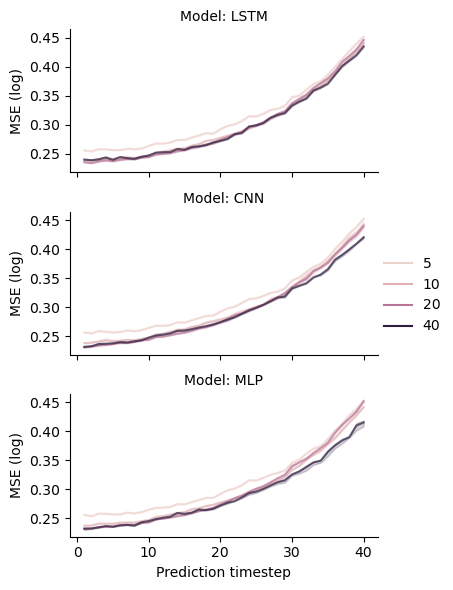

In [75]:
g = sns.FacetGrid(df_long, row ="pre", sharey=True, height = 2, aspect = 2)  # Different plot per `input_size`
g.map_dataframe(sns.lineplot, x="indices", y="mses", hue="input_size", alpha = 0.7)


# Adjust aesthetics
g.set_axis_labels("Prediction timestep", "MSE (log)")
g.set_titles("Model: {row_name}")
g.add_legend()

plt.show()

<Figure size 200x1000 with 0 Axes>

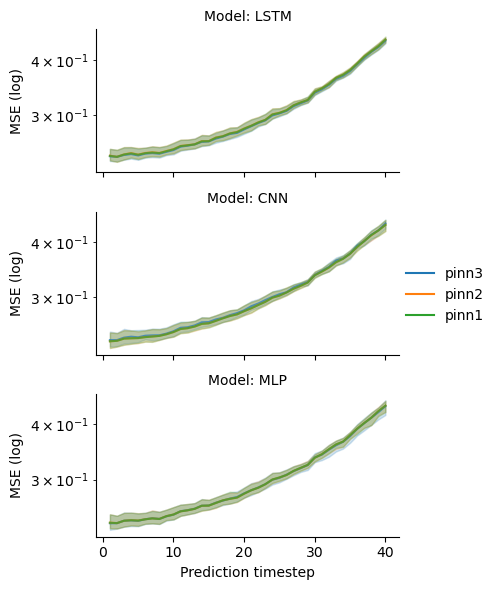

In [71]:
# Create separate plots for each `input_size`
plt.figure(figsize = (2,10))
g = sns.FacetGrid(df_long, row ="pre", sharey=True, height = 2, aspect = 2)  # Different plot per `input_size`
g.map_dataframe(sns.lineplot, x="indices", y="mses", hue="suff", alpha = 0.7)

# Set logarithmic scale for the y-axis
g.set(yscale='log')

# Adjust aesthetics
g.set_axis_labels("Prediction timestep", "MSE (log)")
g.set_titles("Model: {row_name}")
g.add_legend()

plt.show()

In [25]:
df_results.to_csv('results/model_results.csv')

In [26]:
df_answers.to_csv('results/model_answers.csv')

In [45]:
df_results

,model,input_size,output_size,loss,predictions
0,Baseline,5,1,0.258061,"[[1.099663496017456], [1.1225848197937012], [1..."
1,Baseline,5,5,0.258780,"[[1.0943284034729004, 1.090895652770996, 1.095..."
2,Baseline,5,10,0.264274,"[[1.0818965435028076, 1.08206307888031, 1.0844..."
3,Baseline,5,20,0.280811,"[[1.0738946199417114, 1.0732184648513794, 1.07..."
4,Baseline,5,40,0.313093,"[[1.0540786981582642, 1.0586038827896118, 1.04..."
...,...,...,...,...,...
15,MLP,40,1,0.233380,"[[1.2438881397247314], [1.3153572082519531], [..."
16,MLP,40,5,0.235131,"[[1.2880436182022095, 1.260267734527588, 1.277..."
17,MLP,40,10,0.240874,"[[1.269455075263977, 1.288851261138916, 1.3011..."
18,MLP,40,20,0.257552,"[[1.2717398405075073, 1.2799222469329834, 1.27..."
